## Import Libraries and dataset

In [45]:
# !pip install cartopy

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from shapely.geometry import Point
import random

In [47]:
airport_data = pd.read_csv('Airports.csv')
flight_data = pd.read_excel('Flight Data.xlsx')

In [48]:
# airport_data.head(4)
flight_data.head(4)

Source   Source City Source Country Target   Target City Target Country  \
0    FNC       Funchal       Portugal    PXO   Porto Santo       Portugal   
1    PXO   Porto Santo       Portugal    FNC       Funchal       Portugal   
2    AEP  Buenos Aires      Argentina    MVD    Montevideo        Uruguay   
3    MVD    Montevideo        Uruguay    AEP  Buenos Aires      Argentina   

   Weight  
0    9864  
1    9864  
2    1463  
3    1463

## Data Pre-processing

In [49]:
# airport_data.isnull().any()
flight_data.isnull().any()

Source            False
Source City       False
Source Country    False
Target            False
Target City       False
Target Country    False
Weight            False
dtype: bool

In [50]:
flight_data.loc[flight_data['Weight']==0]

Source Source City  Source Country Target Target City  Target Country  \
12846    BKK     Bangkok        Thailand    TPE      Taipei  Chinese Taipei   
12863    TPE      Taipei  Chinese Taipei    BKK     Bangkok        Thailand   

       Weight  
12846       0  
12863       0

In [51]:
flight = flight_data.drop(flight_data.loc[flight_data['Weight']==0].index)
flight.loc[flight_data['Weight']==0]

Empty DataFrame
Columns: [Source, Source City, Source Country, Target, Target City, Target Country, Weight]
Index: []

In [52]:
# flight.loc[flight['Weight']==0]

In [53]:
# Data Reduction to avoid extra data usage. The airports_coord consists of all unique airports that are available in fight_data.xlsx 
unique_airports = flight_data['Source'].unique()
airports = airport_data.loc[airport_data['id'].isin(unique_airports)]
airports

id           label      country        Lat        Lon
11    KBL           Kabul  Afghanistan  34.516690  69.183260
29    TIA          Tirana      Albania  41.327541  19.818883
30    AAE          Annaba      Algeria  36.920006   7.759981
31    ALG         Algiers      Algeria  36.763065   3.050553
32    AZR           Adrar      Algeria  27.869990  -0.289967
...   ...             ...          ...        ...        ...
9010  MFU           Mfuwe       Zambia -13.066667  31.766667
9014  NLA           Ndola       Zambia -12.999944  28.650024
9021  BUQ        Bulawayo     Zimbabwe -20.169998  28.580002
9025  HRE          Harare     Zimbabwe -17.817790  31.044709
9031  VFA  Victoria Falls     Zimbabwe -17.929617  25.840014

[3478 rows x 5 columns]

In [54]:
USA_flight = flight.loc[(flight['Source Country']=='USA') & (flight['Target Country']=='USA')]
USA_airports = airports.loc[airports['country']=='United States']
USA_flight

Source    Source City Source Country Target    Target City  \
13       SOV       Seldovia            USA    KEB       Nanwalek   
14       HOM          Homer            USA    SOV       Seldovia   
15       SOV       Seldovia            USA    HOM          Homer   
16       PGM    Port Graham            USA    HOM          Homer   
17       KEB       Nanwalek            USA    PGM    Port Graham   
...      ...            ...            ...    ...            ...   
60414    ALM     Alamogordo            USA    ABQ    Albuquerque   
60415    OKC  Oklahoma City            USA    TUL          Tulsa   
60416    TUL          Tulsa            USA    OKC  Oklahoma City   
60417    ABQ    Albuquerque            USA    OKC  Oklahoma City   
60418    OKC  Oklahoma City            USA    ABQ    Albuquerque   

      Target Country  Weight  
13               USA     144  
14               USA     184  
15               USA      40  
16               USA     144  
17               USA     144  
...              ...     ...  
60414            USA     816  
60415            USA    2720  
60416            USA    2720  
60417            USA    1728  
60418            USA    1728  

[13263 rows x 7 columns]

In [55]:
uk_flight = flight.loc[(flight['Source Country']=='United Kingdom') & (flight['Target Country']=='United Kingdom')]
uk_airports = airports.loc[airports['country']=='United Kingdom']
uk_flight

Source      Source City  Source Country Target  Target City  \
292      EMA       Nottingham  United Kingdom    IOM  Isle of Man   
293      IOM      Isle of Man  United Kingdom    EMA   Nottingham   
294      EDI        Edinburgh  United Kingdom    IOM  Isle of Man   
295      IOM      Isle of Man  United Kingdom    EDI    Edinburgh   
296      IOM      Isle of Man  United Kingdom    LPL    Liverpool   
...      ...              ...             ...    ...          ...   
58422    EMA       Nottingham  United Kingdom    BFS      Belfast   
58423    EMA       Nottingham  United Kingdom    JER       Jersey   
58425    JER           Jersey  United Kingdom    EMA   Nottingham   
58427    MAN  Manchester (GB)  United Kingdom    BFS      Belfast   
60461    BFS          Belfast  United Kingdom    LTN  London (GB)   

       Target Country  Weight  
292    United Kingdom     513  
293    United Kingdom     513  
294    United Kingdom    1026  
295    United Kingdom    1026  
296    United Kingdom    3154  
...               ...     ...  
58422  United Kingdom    5895  
58423  United Kingdom    4061  
58425  United Kingdom    4061  
58427  United Kingdom   11988  
60461  United Kingdom     378  

[638 rows x 7 columns]

In [56]:
china_flight = flight.loc[(flight['Source Country']=='China') & (flight['Target Country']=='China')]
china_airports = airports.loc[airports['country']=='China']
china_flight

Source Source City Source Country Target Target City Target Country  \
7113     PEK     Beijing          China    PVG    Shanghai          China   
7116     PVG    Shanghai          China    PEK     Beijing          China   
13304    CAN   Guangzhou          China    MIG    Mianyang          China   
13305    CKG   Chongqing          China    DYG      Dayong          China   
13306    CTU     Chengdu          China    PEK     Beijing          China   
...      ...         ...            ...    ...         ...            ...   
60200    KHN    Nanchang          China    SZX    Shenzhen          China   
60201    KWE     Guiyang          China    SZX    Shenzhen          China   
60202    SZX    Shenzhen          China    CSX    Changsha          China   
60203    SZX    Shenzhen          China    KHN    Nanchang          China   
60204    SZX    Shenzhen          China    KWE     Guiyang          China   

       Weight  
7113     8100  
7116     8370  
13304    1794  
13305    2484  
13306   15500  
...       ...  
60200    4352  
60201    4216  
60202    7208  
60203    4352  
60204    4216  

[2602 rows x 7 columns]

In [57]:
australia_flight = flight.loc[(flight['Source Country']=='Australia') & (flight['Target Country']=='Australia')]
australia_airports = airports.loc[airports['country']=='Australia']
australia_flight

Source     Source City Source Country Target     Target City  \
8644     CNS          Cairns      Australia    OOL      Gold Coast   
8645     MEL  Melbourne (AU)      Australia    SYD     Sydney (AU)   
8646     OOL      Gold Coast      Australia    CNS          Cairns   
8647     SYD     Sydney (AU)      Australia    MEL  Melbourne (AU)   
8649     CNS          Cairns      Australia    SYD     Sydney (AU)   
...      ...             ...            ...    ...             ...   
60400    ADL        Adelaide      Australia    WYA         Whyalla   
60401    CBR        Canberra      Australia    TGN       Traralgon   
60402    CPD     Coober Pedy      Australia    ADL        Adelaide   
60403    TGN       Traralgon      Australia    CBR        Canberra   
60404    WYA         Whyalla      Australia    ADL        Adelaide   

      Target Country  Weight  
8644       Australia   10569  
8645       Australia    1084  
8646       Australia    8401  
8647       Australia    1084  
8649       Australia    1897  
...              ...     ...  
60400      Australia     828  
60401      Australia     972  
60402      Australia     418  
60403      Australia     972  
60404      Australia     828  

[1043 rows x 7 columns]

In [58]:
print('USA Flight\n',USA_flight.describe())
print('\nUK Flight\n',uk_flight.describe())
print('\nChina Flight\n',china_flight.describe())
print('\nAustralia Flight\n',australia_flight.describe())

USA Flight
              Weight
count  13263.000000
mean    5733.437985
std     6845.065535
min        9.000000
25%     1450.000000
50%     3942.000000
75%     7400.000000
max    78501.000000

UK Flight
              Weight
count    638.000000
mean    4614.017241
std     5925.410962
min       32.000000
25%      851.000000
50%     2390.000000
75%     5886.000000
max    35512.000000

China Flight
              Weight
count   2602.000000
mean    4148.031130
std     4094.064798
min      136.000000
25%     1400.000000
50%     3100.000000
75%     4929.000000
max    35478.000000

Australia Flight
              Weight
count   1043.000000
mean    3558.427613
std     8259.419233
min       20.000000
25%      258.000000
50%     1080.000000
75%     3067.000000
max    91600.000000


## Making Network Graph for Countries (internal flights only)

In [59]:
# uk_flights = flight.loc[(flight['Source Country']=='United Kingdom') & (flight['Target Country']=='United Kingdom')]
# uk_airports = airports_coord.loc[airports_coord['country']=='United Kingdom']

# mean_weight = uk_flights['Weight'].mean()
# print(int(mean_weight))

In [60]:
def country_dataframe(country_name):
    x = flight.loc[(flight['Source Country']==country_name) & (flight['Target Country']==country_name)]
    if country_name == 'USA':
        y = airports.loc[airports['country']=='United States']
    else:
        y = airports.loc[airports['country']==country_name]        
    return x,y

In [61]:
#Plotting the country map
def plot_airline_network(country_name):
    flight_details, airport_details = country_dataframe(country_name)
    
    fig, ax = plt.subplots(figsize=(15,15), subplot_kw={'projection':ccrs.PlateCarree()})
#     ax.set_extent([-10, 2, 49, 61])     # Country co-ordinates
    if country_name == 'United Kingdom':
        ax.set_extent([-10, 2, 49, 61])
    elif country_name == 'USA':
        ax.set_extent([-180, -50, 10, 70])
    elif country_name == 'China':
        ax.set_extent([70, 140, 15, 55])
    elif country_name == 'Australia':
        ax.set_extent([110, 155, -45, -10])
    elif country_name == 'India':
        ax.set_extent([65, 100, 5, 40])

    ax.add_feature(cfeature.COASTLINE, linewidth=1)
    ax.add_feature(cfeature.BORDERS, linewidth=1)
    plt.title(f'Airline Network for {country_name}')

    # Plotting airports as a point
    ax.scatter(x=airport_details['Lon'], y=airport_details['Lat'], color='red', marker='o', s=50, alpha=0.5, transform=ccrs.PlateCarree())
    for i, row in airport_details.iterrows():
        ax.text(x=row['Lon'], y=row['Lat'], s=row['id'], transform=ccrs.PlateCarree(), fontsize=8, fontweight='bold', color='black')
    
    # Making network plots between the airports
    for i, row in flight_details.iterrows():
        source_airport = row['Source']
        target_airport = row['Target']

        source = airport_details.loc[airport_details['id'] == source_airport]
        target = airport_details.loc[airport_details['id'] == target_airport]

        if not source.empty and not target.empty:
            passengers = row['Weight']
            mean_weight = int(flight_details['Weight'].mean())

            ax.plot([source['Lon'].values[0], target['Lon'].values[0]],
                    [source['Lat'].values[0], target['Lat'].values[0]],
                    color='blue', linewidth=0.25, alpha = min(1.0, passengers / mean_weight), transform=ccrs.PlateCarree())

    # Formatting the plot graph        
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}

    plt.show()


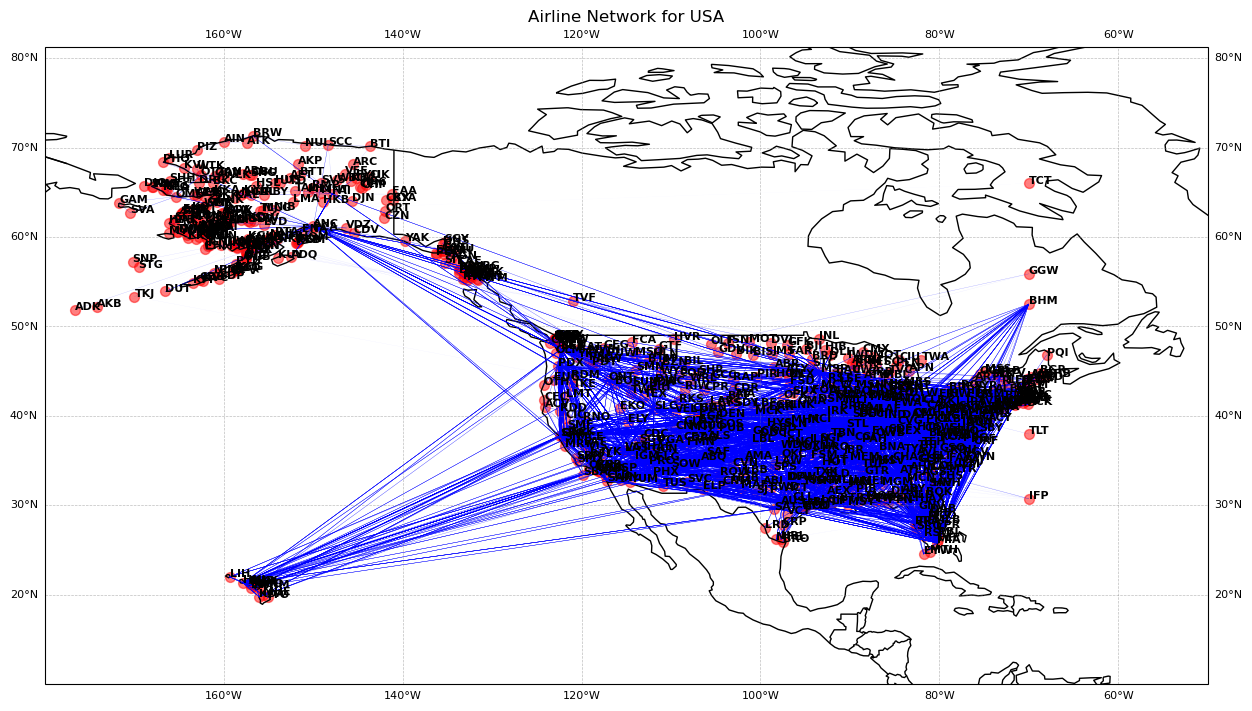

In [62]:
plot_airline_network('USA')

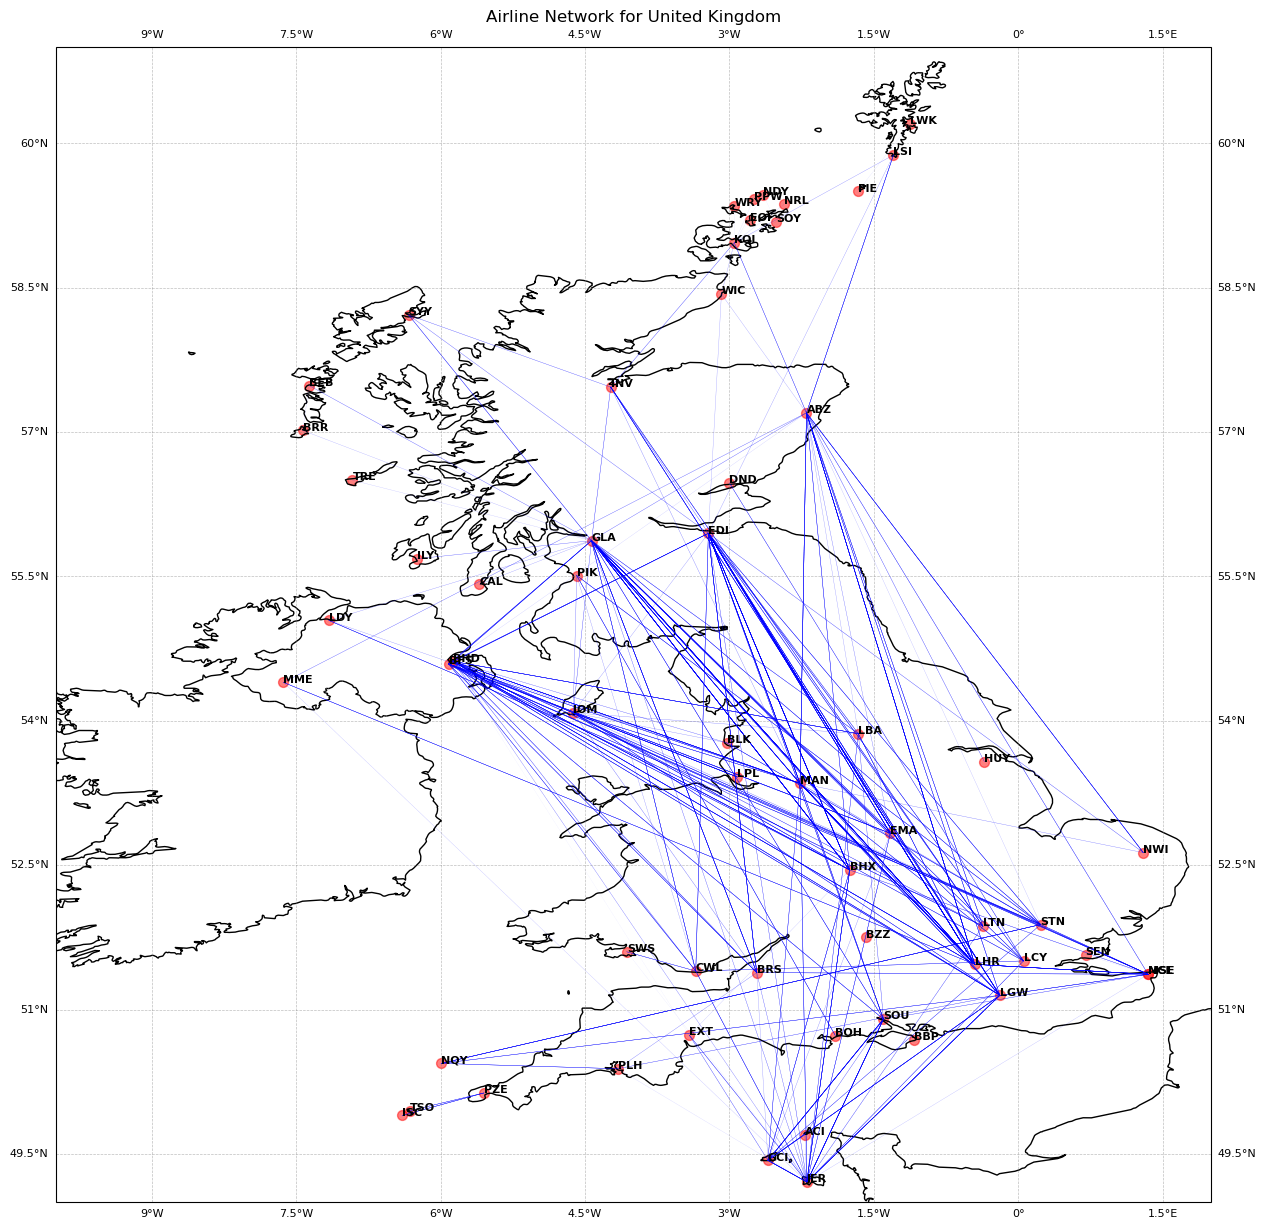

In [63]:
plot_airline_network('United Kingdom')

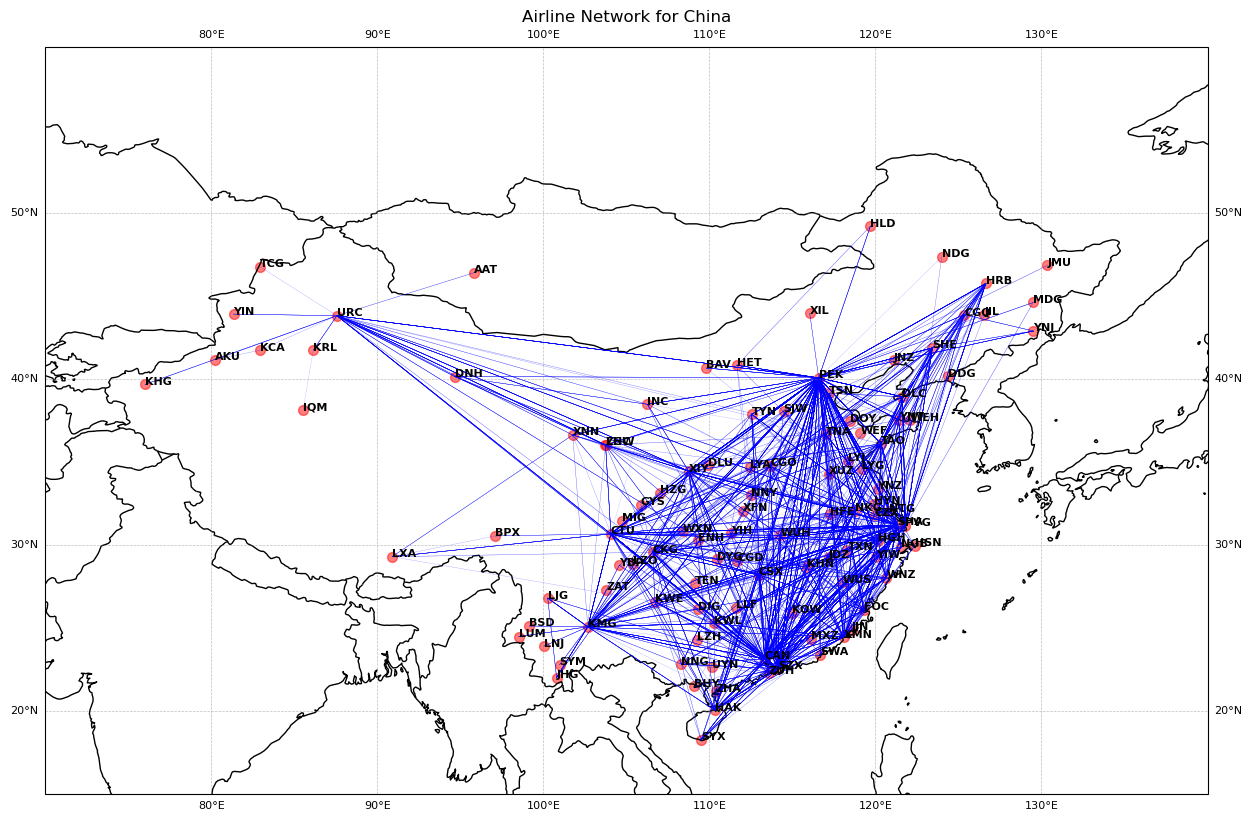

In [64]:
plot_airline_network('China')

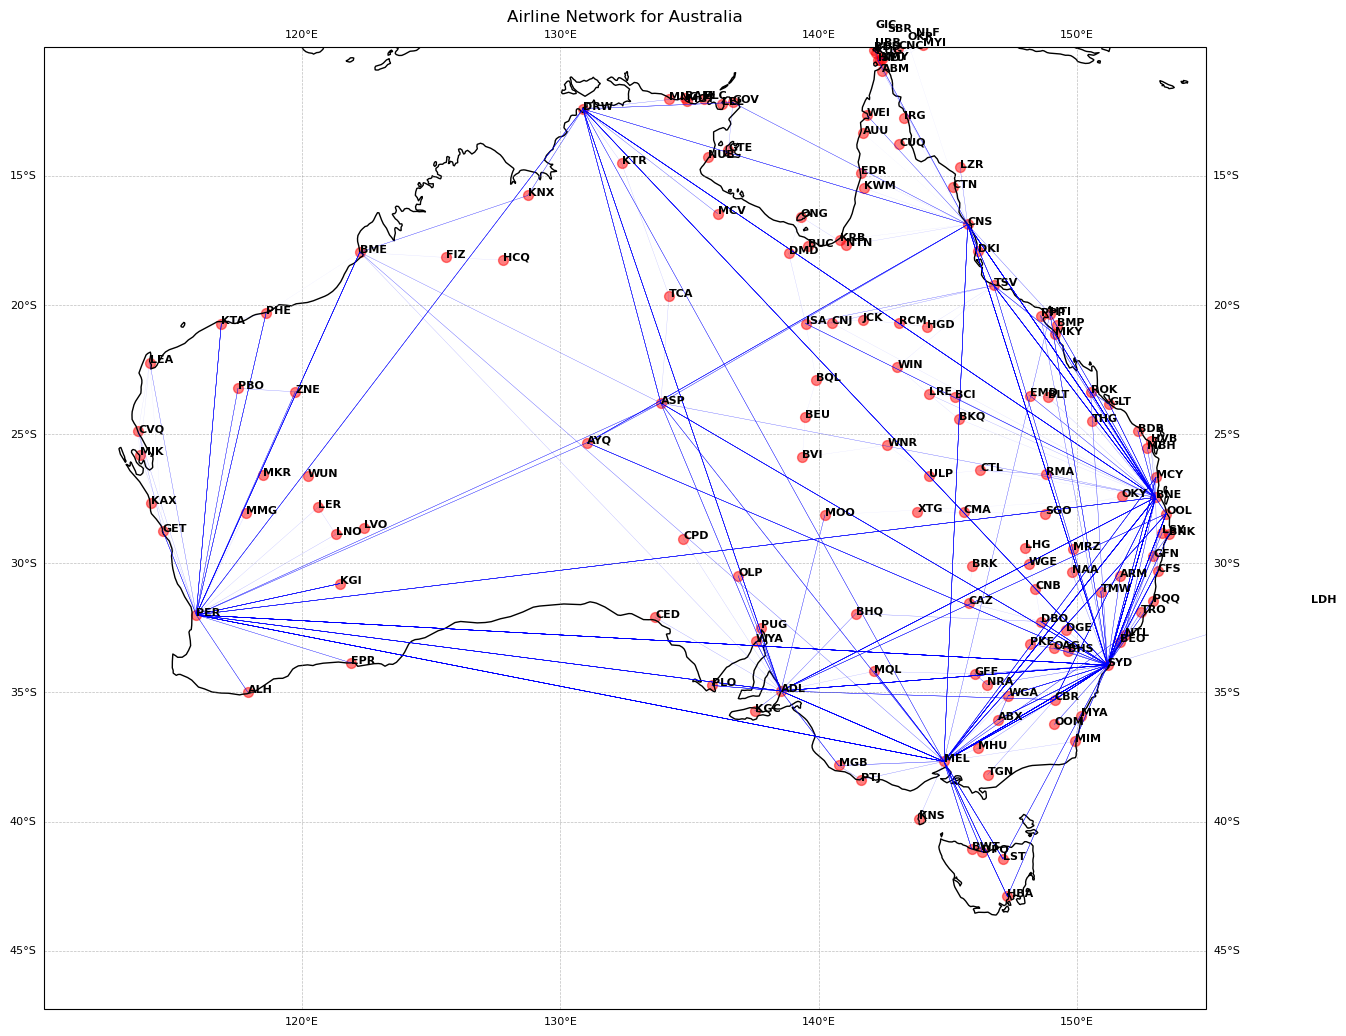

In [65]:
plot_airline_network('Australia')

## Q 2.1 Degree Distribution

In [66]:
def country_color(country_name):
    match country_name:
        case 'USA':
            return 'red'
        case 'United Kingdom':
            return 'blue'
        case 'China':
            return 'green'
        case 'Australia':
            return 'brown'

In [67]:
def degree_distribution(country_name):
    flight_details, airport_details = country_dataframe(country_name)

    # Create a weighted graph
    G = nx.Graph()

    # Add nodes in the graph
    for index, row in airport_details.iterrows():
        G.add_node(node_for_adding=row['id'], pos=(row['Lon'],row['Lat']))

    # Add edges in the graph along with their weights
    for index, row in flight_details.iterrows():
        G.add_edge(u_of_edge=row['Source'],v_of_edge=row['Target'],weight=row['Weight'])

    # Compute the weighted degrees of each node
    calc_degrees = dict(G.degree(weight='weight'))

    # Sort the nodes in desc order (given in problem statement)
    desc_nodes = sorted(calc_degrees, key=calc_degrees.get,reverse=True)

    # Compute the logarithmic distribution
    log_degree = np.log(list(calc_degrees[node] for node in desc_nodes))

    # Plot the degree distribution with x-axis representing descending rank
    plt.figure(figsize=(10,8))
    plt.plot(range(1, len(desc_nodes) + 1), log_degree, color=country_color(country_name))
    plt.xlabel('Rank (Descending)')
    plt.ylabel('Logscale of Weighted Degree')
    plt.title(f'Degree Distribution for {country_name}')
    plt.yscale('log')
    plt.show()

C:\Users\ankit\AppData\Local\Temp\ipykernel_3976\3413936667.py:22: RuntimeWarning: divide by zero encountered in log
  log_degree = np.log(list(calc_degrees[node] for node in desc_nodes))


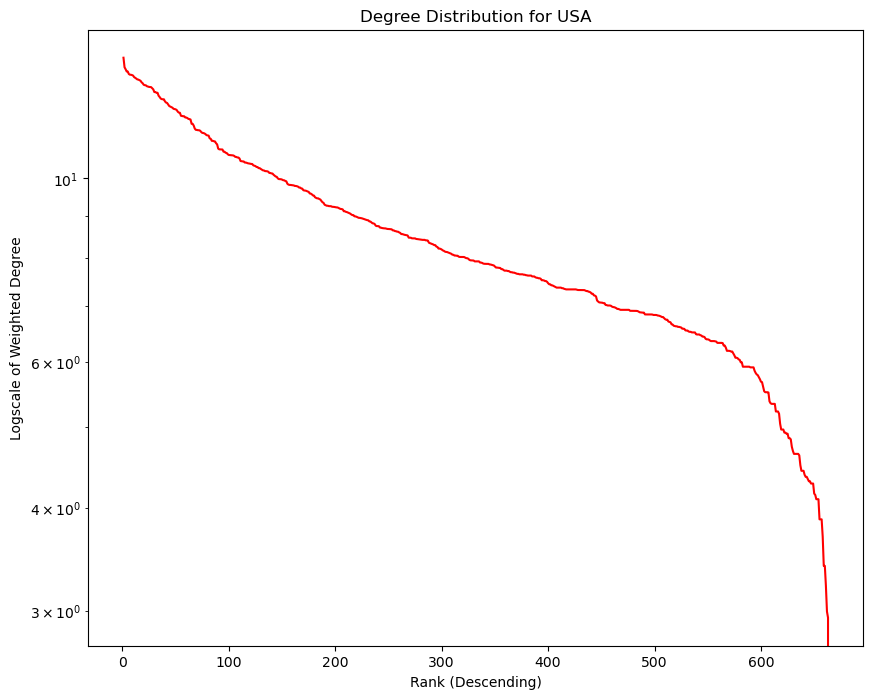

In [68]:
degree_distribution('USA')

C:\Users\ankit\AppData\Local\Temp\ipykernel_3976\3413936667.py:22: RuntimeWarning: divide by zero encountered in log
  log_degree = np.log(list(calc_degrees[node] for node in desc_nodes))


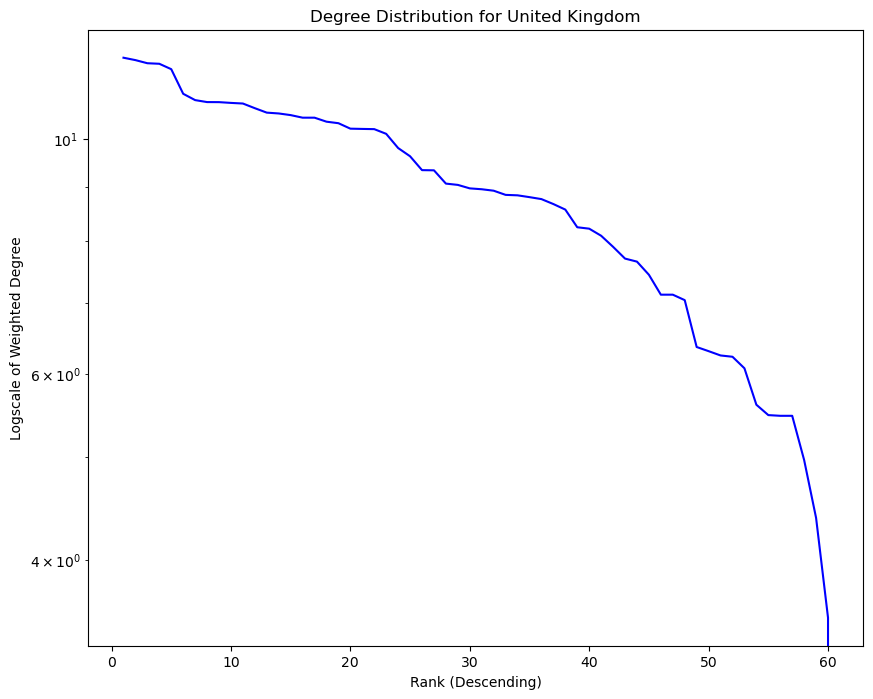

In [69]:
degree_distribution('United Kingdom')

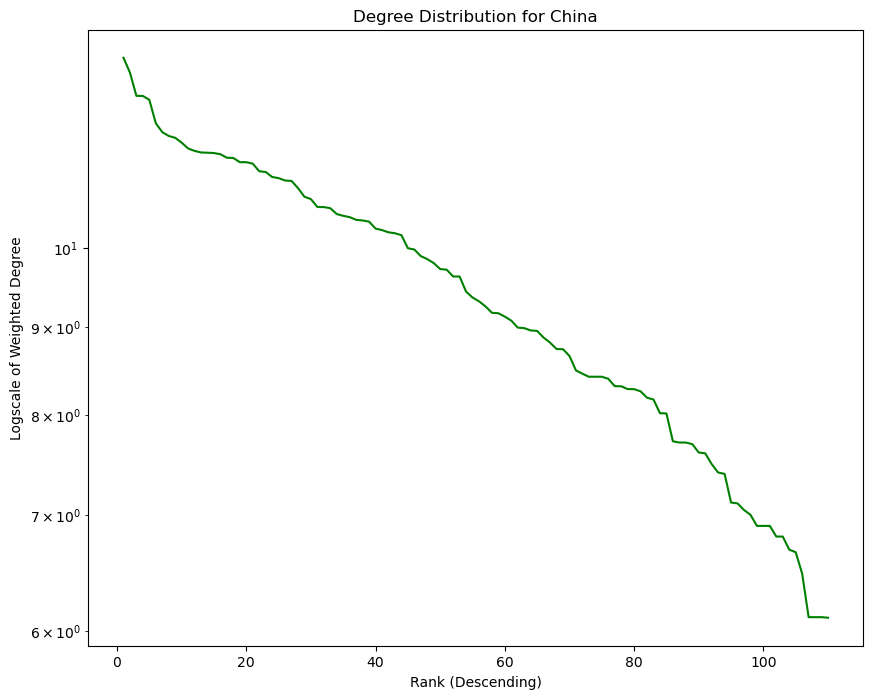

In [70]:
degree_distribution('China')

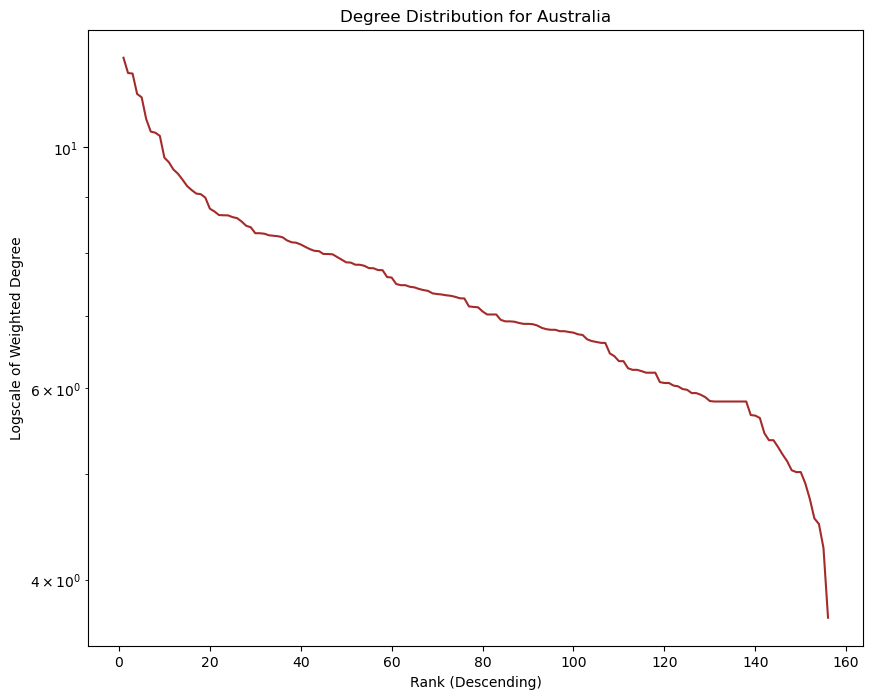

In [71]:
degree_distribution('Australia')

## Q 2.2 Degree vs. betweenness distribution

In [72]:
def degree_vs_betweeness(country_name):
    flight_details, airport_details = country_dataframe(country_name)
    
    #Create a graph G
    G = nx.from_pandas_edgelist(flight_details, source="Source", target="Target", edge_attr="Weight", create_using=nx.DiGraph())
    
    #calculate the betweenness and degree
    betweenness = nx.betweenness_centrality(G)
    degree = dict(G.degree(weight='weight'))
    
    # Plot the degrees and betweeness values
   
    plt.bar(list(degree.values()), list(betweenness.values()), color=country_color(country_name), label='Degree', alpha=1)
    plt.scatter(list(degree.values()), list(betweenness.values()), color='yellow', label='Betweenness Centrality', alpha=1)
    plt.title(f"Degree vs. Betweenness Distribution for {country_name}")
    plt.xlabel("Degree")
    plt.ylabel("Betweenness Centrality")
    plt.legend()
    plt.show()

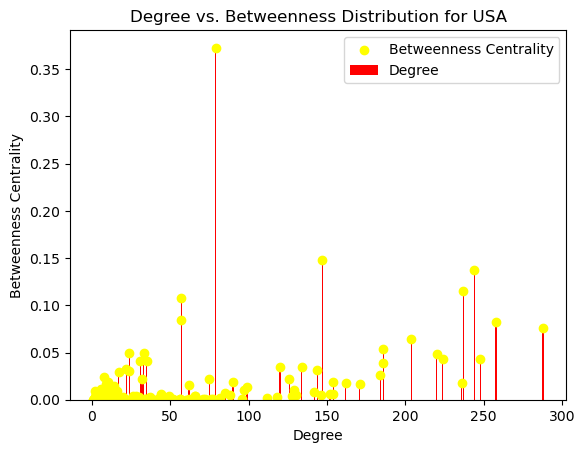

In [73]:
degree_vs_betweeness("USA")

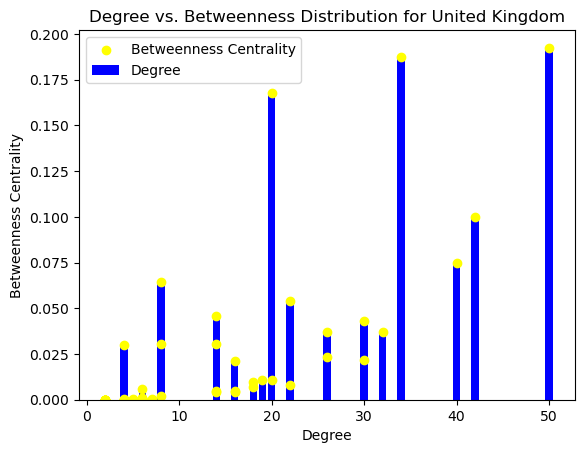

In [74]:
degree_vs_betweeness("United Kingdom")

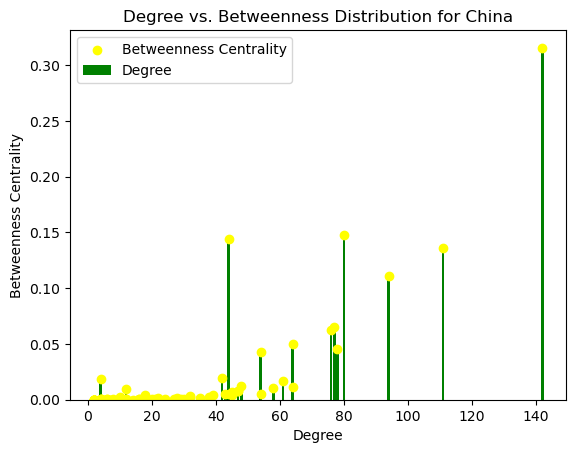

In [75]:
degree_vs_betweeness("China")

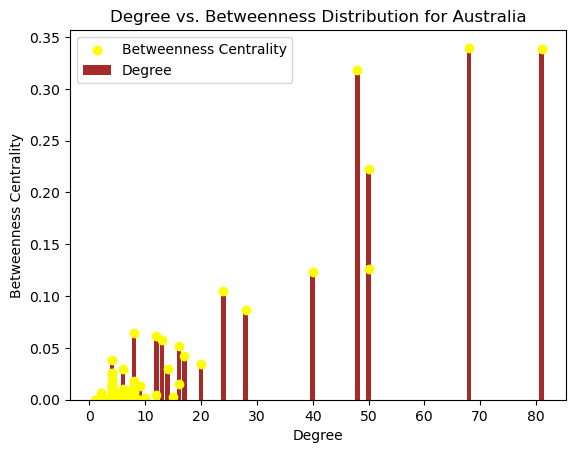

In [76]:
degree_vs_betweeness("Australia")

## Q 2.3 Assortativity

In [77]:
def assortativity(country_name):
    flight_details, airport_details = country_dataframe(country_name)

    # Create a graph G
    G = nx.from_pandas_edgelist(flight_details, source="Source", target="Target", edge_attr="Weight", create_using=nx.DiGraph())

    # Calculate the assorative coefficient value.
    assortativity = nx.degree_assortativity_coefficient(G)
    print(f"Assortativity for {country_name}: {assortativity}")


    # Degrees and edges for the graph
    degrees = dict(G.degree())
    edges = G.edges()
    # edges
    # degrees

    # Plot degrees vs degree relationship for all connected nodes
    for edge in edges:
        node1, node2 = edge
        degree1, degree2 = degrees[node1], degrees[node2]
        plt.scatter(x=degree1, y=degree2)

    plt.xlabel('Degree of Nodes')
    plt.ylabel('Degree of Nodes')
    plt.title(f"Assortative for {country_name}")
    plt.show()

Assortativity for USA: -0.22099555904369625


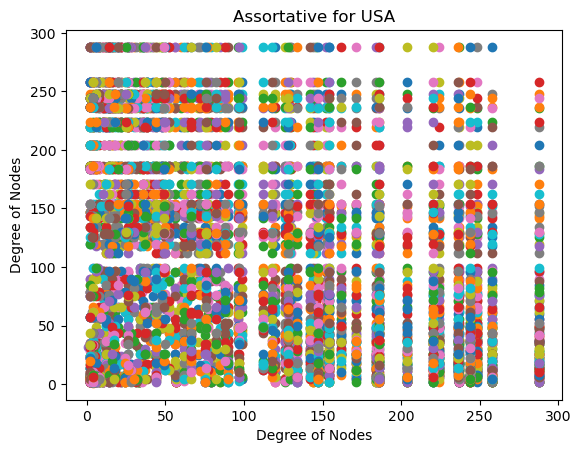

In [78]:
assortativity('USA')

Assortativity for United Kingdom: -0.12981793581378992


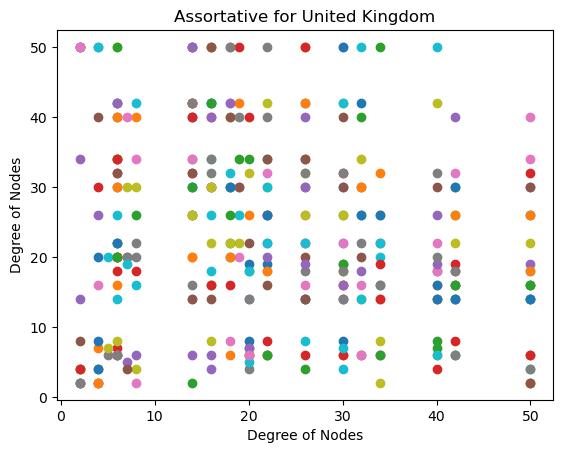

In [79]:
assortativity('United Kingdom')

Assortativity for China: -0.39620662861195355


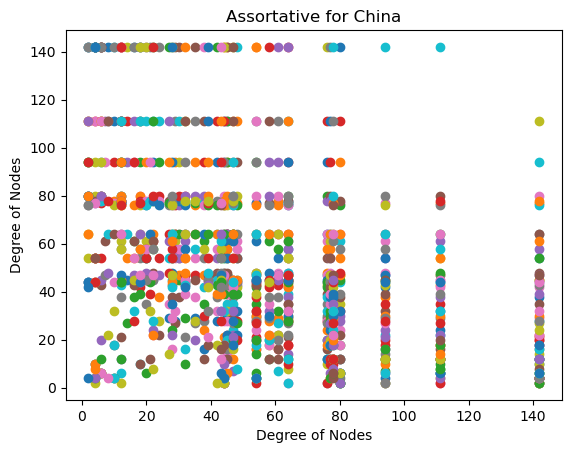

In [80]:
assortativity('China')

Assortativity for Australia: -0.22539512649637627


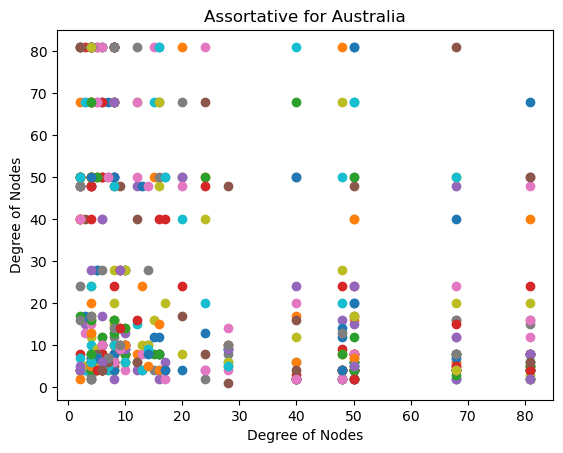

In [81]:
assortativity('Australia')

## Q 2.4 Core Community Size

In [82]:
 def plot_core_community_size(country_name):
    flight_details, airport_details = country_dataframe(country_name)

    # Create a directed graph G
    G = nx.from_pandas_edgelist(flight_details, source="Source", target="Target", edge_attr="Weight", create_using=nx.DiGraph())
    
    # Get the degree of each node and arrange them in desc order
    degrees = dict(G.degree())
    sorted_nodes = sorted(degrees, key=degrees.get, reverse=True)

    # Calculate the number of connected nodes with higher degree for each node
    strong_neighbor_nodes = []
    for node in sorted_nodes:
        higher_degree_neighbors = [neighbor for neighbor in G.neighbors(node) if degrees[neighbor] > degrees[node]]
        strong_neighbor_nodes.append(len(higher_degree_neighbors))

    # Plot the results
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.plot(range(1, len(sorted_nodes) + 1), strong_neighbor_nodes, marker='o', linestyle='-', color=country_color(country_name))
    plt.xlabel('Node Rank (by Degree)')
    plt.ylabel('Number of Connected Nodes with Higher Degree')
    plt.title(f'Core Community Size for {country_name}')

    # Set more x-axis ticks to improve the graph depiction
    if country_name == 'USA':
        plt.xticks(range(1, len(sorted_nodes) + 1, 50))
    else:
        plt.xticks(range(1, len(sorted_nodes) + 1, 10))

    plt.grid(True)
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

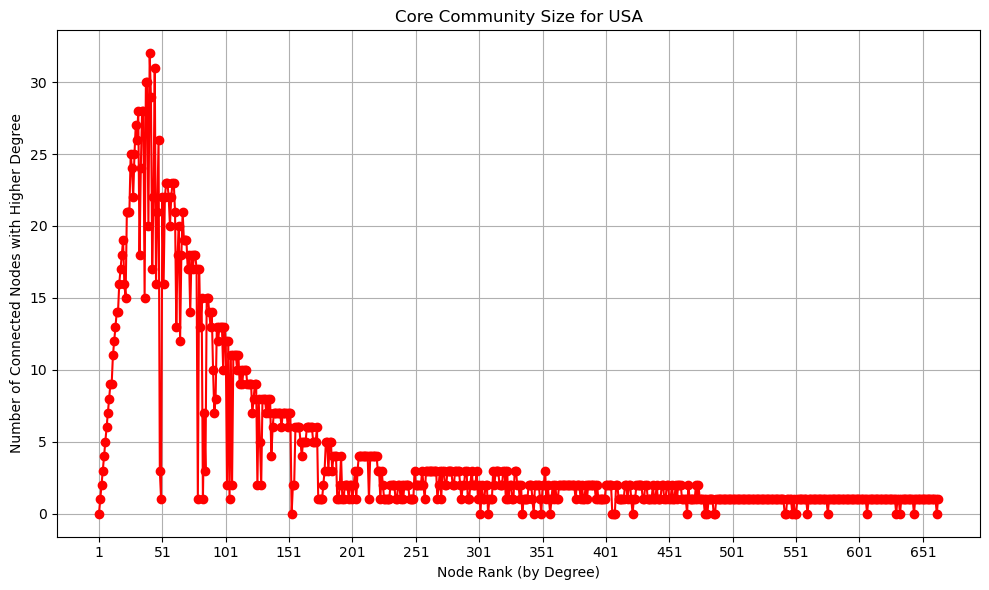

In [83]:
plot_core_community_size('USA')

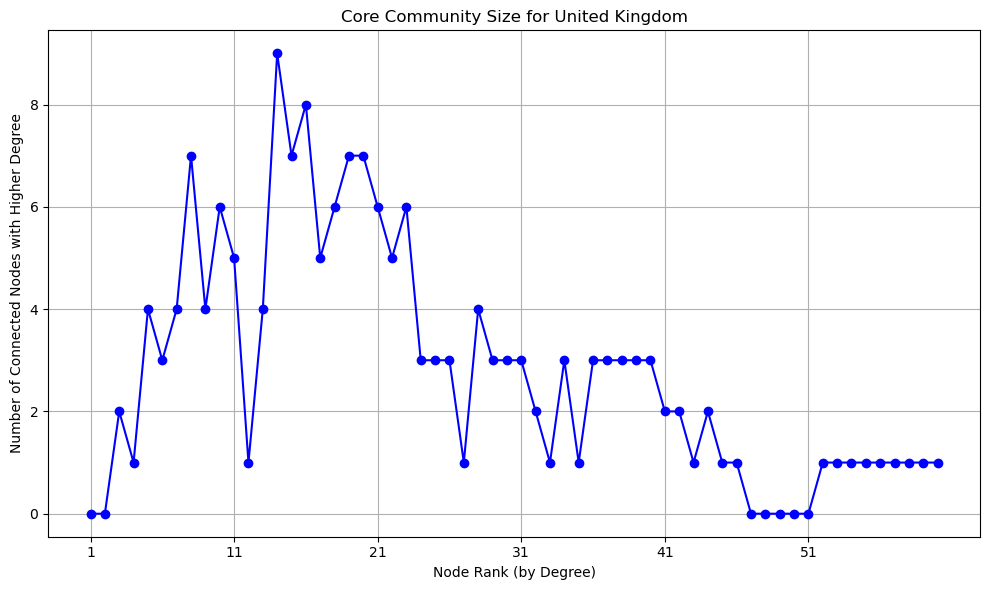

In [84]:
plot_core_community_size('United Kingdom')

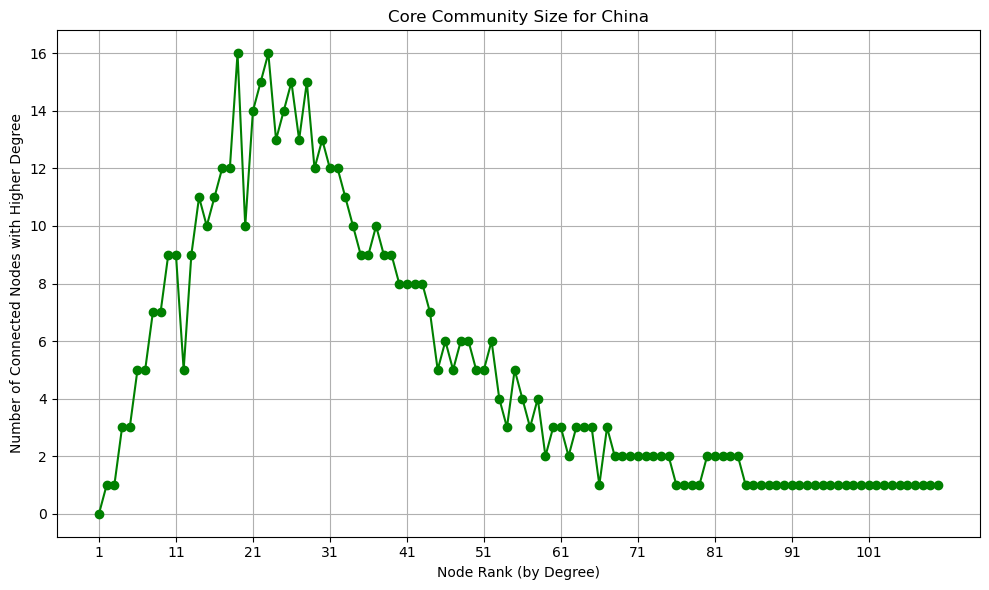

In [85]:
plot_core_community_size('China')

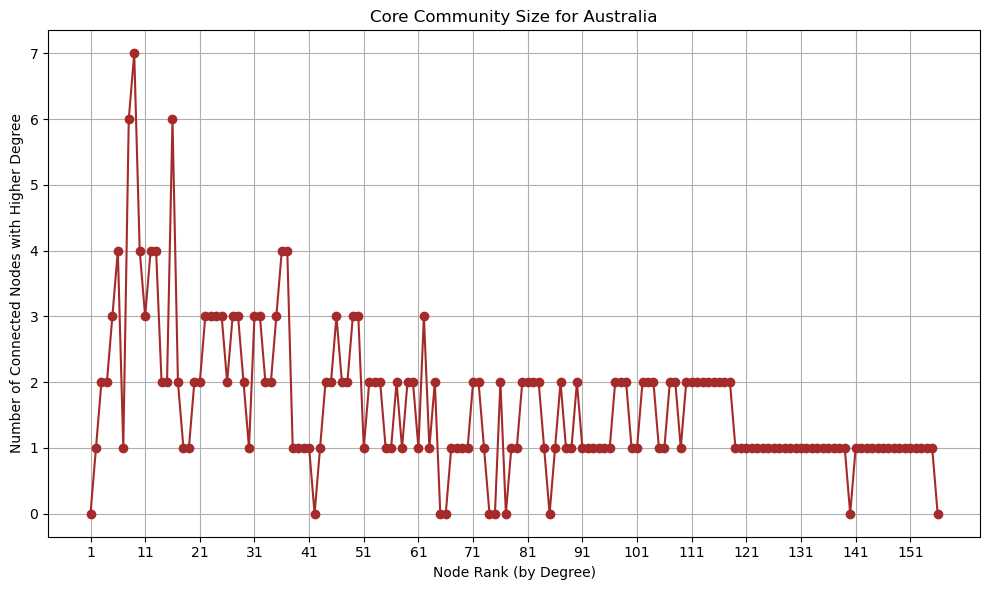

In [86]:
plot_core_community_size('Australia')

## Extra Graphs

### 1. Cumalative Distribution

In [87]:
def plot_cumalative_distribution(country_name):
    flight_details, airport_details = country_dataframe(country_name)

    # Create a directed graph G
    G = nx.from_pandas_edgelist(flight_details, source="Source", target="Target", edge_attr="Weight", create_using=nx.DiGraph())

    # Get the weighted degree of each node and arrange them in desc order
    weighted_degrees = dict(G.degree(weight='weight'))
    sorted_nodes = sorted(weighted_degrees, key=weighted_degrees.get, reverse=True)

    cumalative_distribution = [sum(weighted_degrees[node] for node in sorted_nodes[:i+1]) for i in range(len(sorted_nodes))]

    total_weight = sum(weighted_degrees.values())
    cumalative_distribution = [cumalative / total_weight for cumalative in cumalative_distribution]

    # Plot the distribution
    plt.figure(figsize=(10,8))
    plt.plot(range(1, len(sorted_nodes) + 1), cumalative_distribution, marker = 'o', color='red')
    plt.xlabel('Sorted Nodes in desc order')
    plt.ylabel('Cumalative Distribution')
    plt.title('Cumalative Distribution for the weighted Degrees')
    plt.grid('on')
    plt.show()

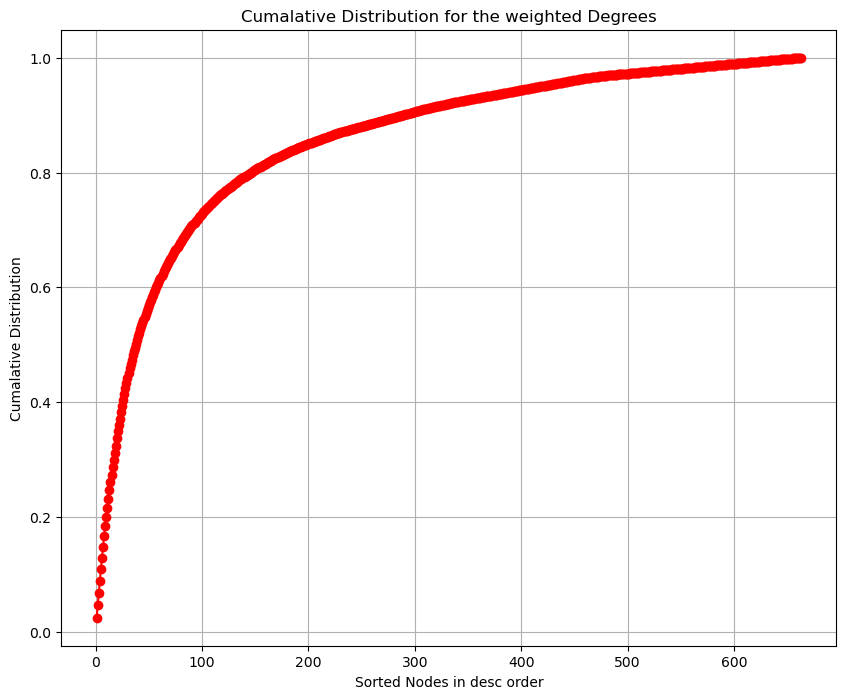

In [88]:
plot_cumalative_distribution('USA')

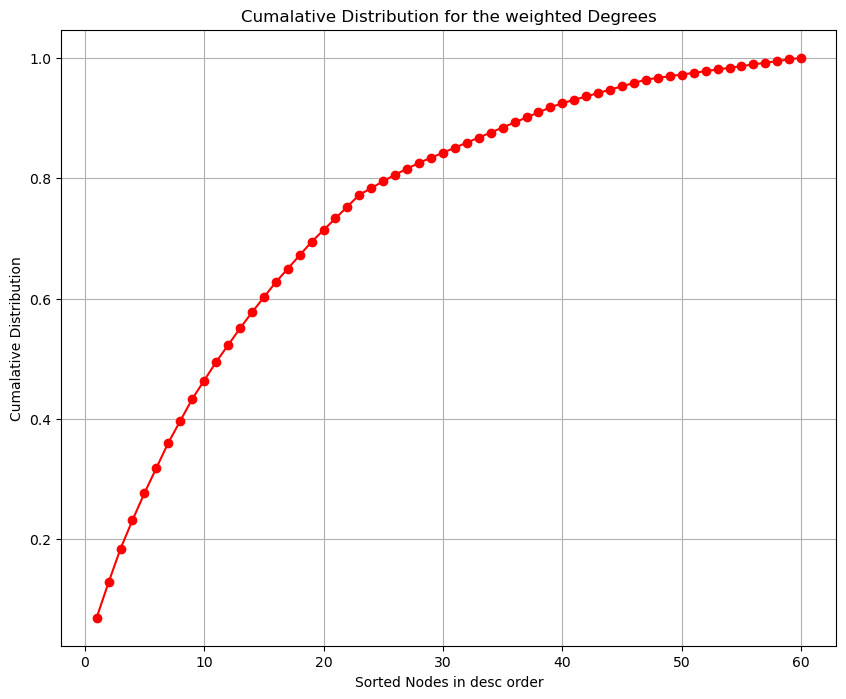

In [89]:
plot_cumalative_distribution('United Kingdom')

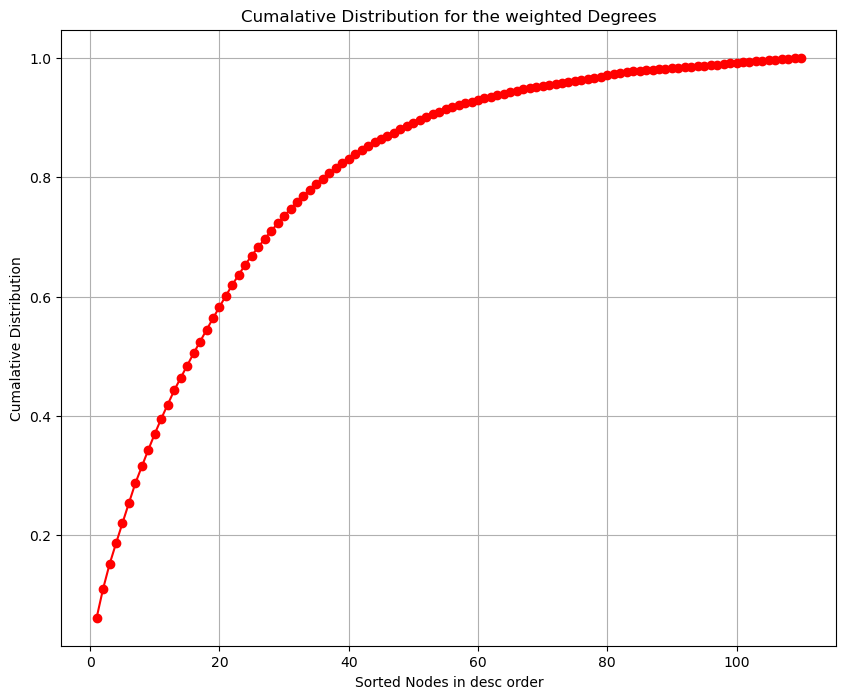

In [90]:
plot_cumalative_distribution('China')

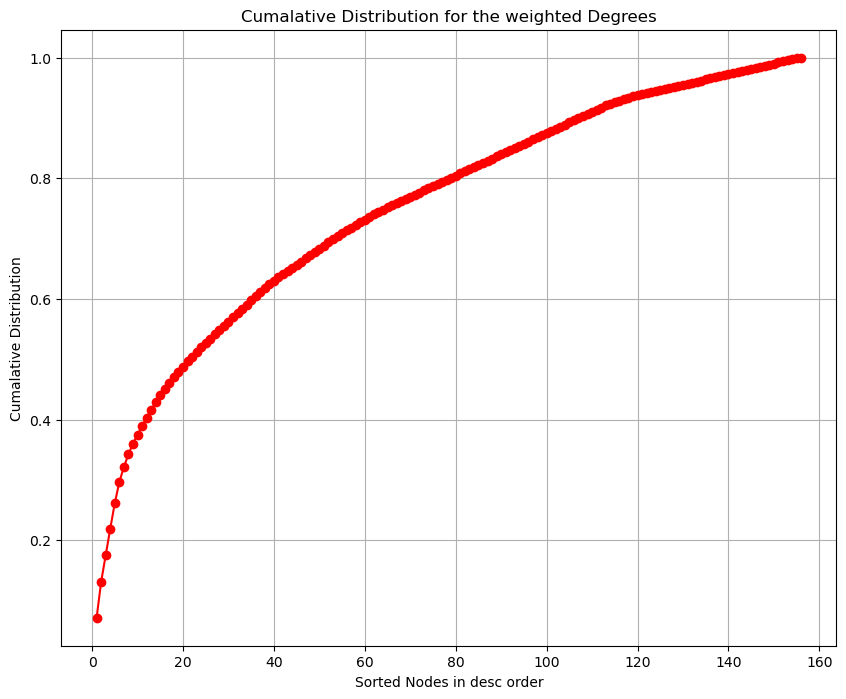

In [91]:
plot_cumalative_distribution('Australia')

### 2. Percolation Analysis

In [94]:
def plot_percolation_analysis(country_name, connection_type):
    flight_details, airport_details = country_dataframe(country_name)

    # Create a directed graph G
    G = nx.from_pandas_edgelist(flight_details, source="Source", target="Target", edge_attr="Weight", create_using=nx.DiGraph())    
 
    def percolation_analysis(graph, percentage, connection):
        G_copy = graph.copy()
        nodes_to_remove = int(percentage * len(G_copy))
        random_nodes = list(G_copy.nodes())
        G_copy.remove_nodes_from(random.sample(random_nodes, nodes_to_remove))
#         G_copy.remove_nodes_from(random.sample(random_nodes, nodes_to_remove))


        if connection == 'weakly':
            connected_components = list(nx.weakly_connected_components(G_copy))
        elif connection == 'strongly':
            connected_components = list(nx.strongly_connected_components(G_copy))

        if not connected_components:
            return 0.0

        # length of the connected_components after removal
        cc_size = len(max(connected_components, key=len))

        return cc_size/len(G_copy.nodes())
    
    removal_percentages = np.arange(0, 1.1, 0.1)
    percolation_results = []

    for percentage in removal_percentages:
        percolation_result = percolation_analysis(G, percentage, connection_type)
        percolation_results.append(percolation_result)

    # Plot the results
    plt.plot(removal_percentages, percolation_results, marker='o', linestyle='-')
    plt.xlabel('Percentage of Nodes Removed')
    plt.ylabel(f'Relative Size of Giant {connection_type} Connected Component')
    plt.title(f'Percolation Analysis for {connection_type} directed')
    plt.grid(True)
    plt.show()

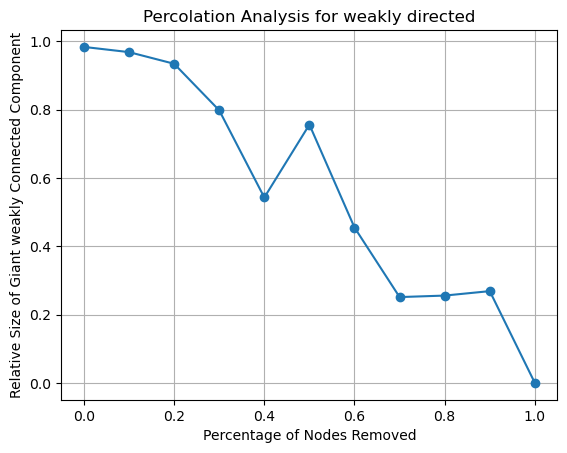

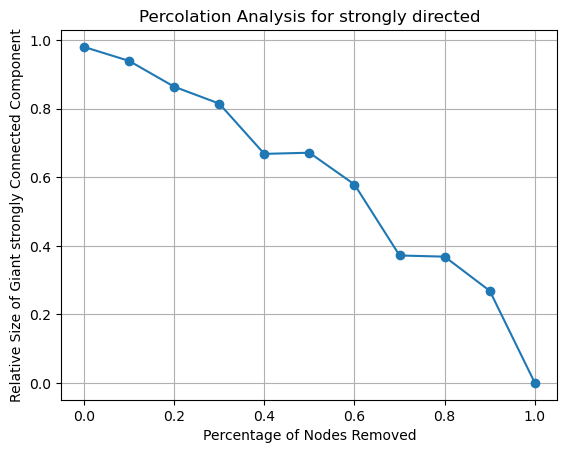

In [96]:
plot_percolation_analysis('USA', 'weakly')
plot_percolation_analysis('USA', 'strongly')

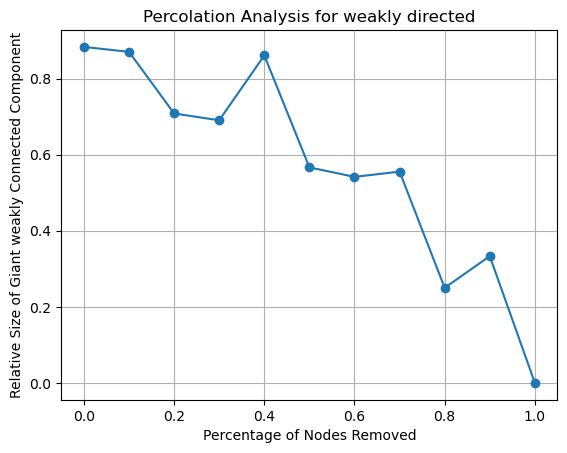

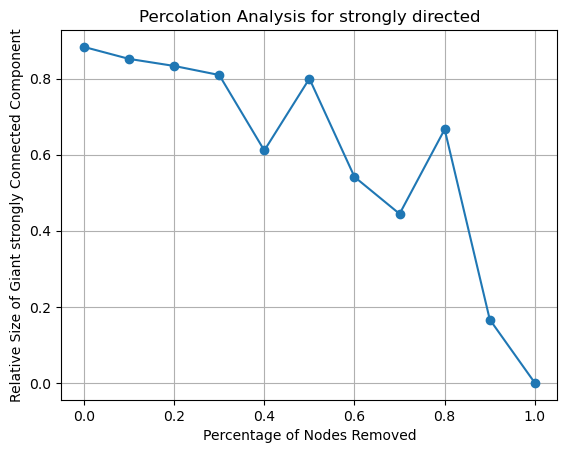

In [97]:
plot_percolation_analysis('United Kingdom', 'weakly')
plot_percolation_analysis('United Kingdom', 'strongly')

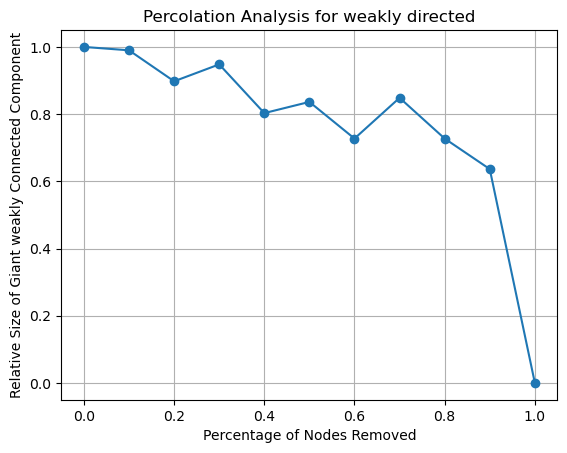

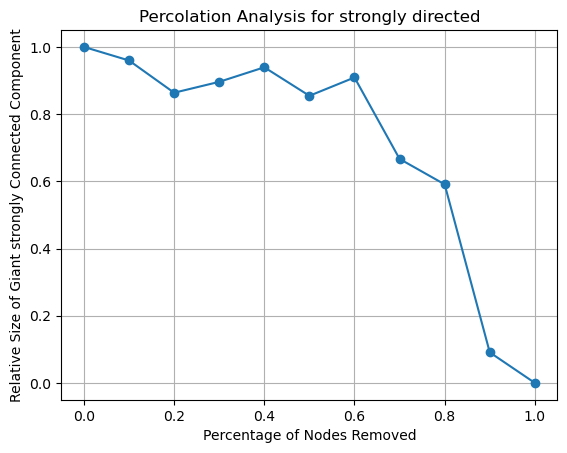

In [98]:
plot_percolation_analysis('China', 'weakly')
plot_percolation_analysis('China', 'strongly')

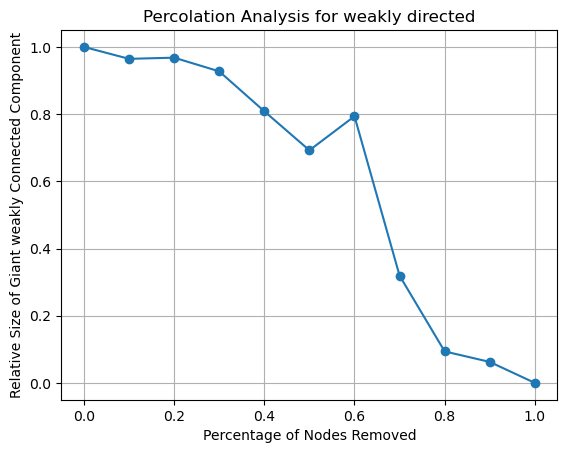

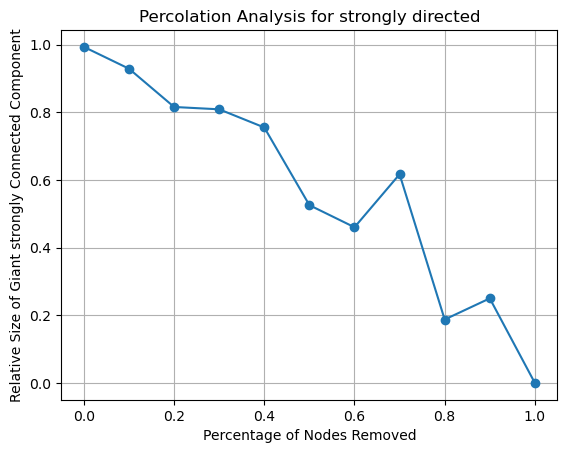

In [99]:
plot_percolation_analysis('Australia', 'weakly')
plot_percolation_analysis('Australia', 'strongly')

## Random Spatial Graphs and Hypothesis

(-0.5423991158179428,
 1.1465628119103022,
 -0.4173676670877833,
 0.3153034414204639)

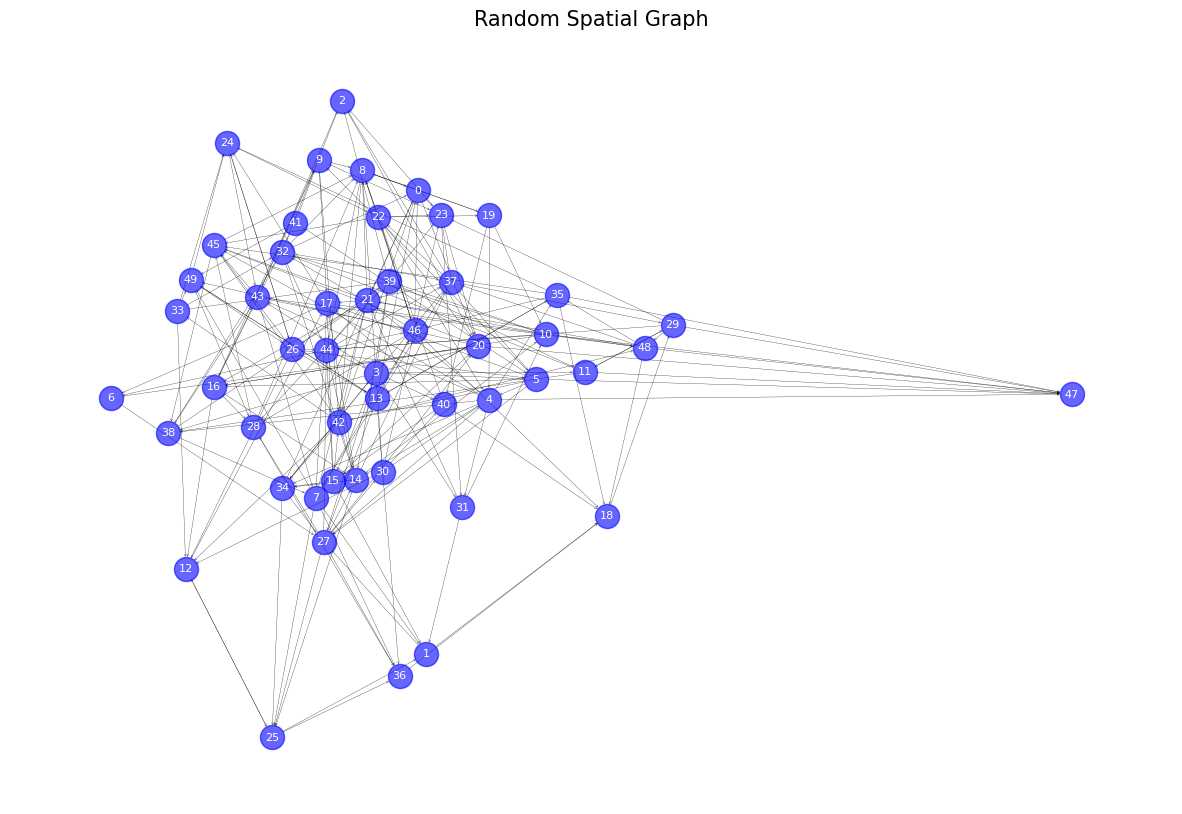

In [100]:
num_airports = 50
prob_of_flight = 0.1  # Lower probability for a weaker network

# Create a directed random graph to simulate a weaker airline network
DG = nx.erdos_renyi_graph(n=num_airports, p=prob_of_flight, directed=True)

# Assign random passenger capacity to each node with more variability
for node in DG.nodes():
    DG.nodes[node]['passenger_capacity'] = np.random.randint(100, 1000)

# Use a spring layout to spread out the nodes for better visibility
pos = nx.spring_layout(DG, seed=42)

# Draw the network with better presentation
plt.figure(figsize=(15, 10))
edges = nx.draw_networkx_edges(DG, pos, arrowstyle='->', arrowsize=4, edge_color='black', width=0.2)
nodes = nx.draw_networkx_nodes(DG, pos, node_size=300, node_color='blue', alpha=0.6)
labels = nx.draw_networkx_labels(DG, pos, font_size=8, font_color='white')

plt.title('Random Spatial Graph', size=15)
plt.axis('off')  # Turn off the axis

In [101]:
# Fuel price impact analysis
fuel_price = 50  # arbitrary units - $50/KM
new_fuel_price = 55  # arbitrary units - $55/KM
distance_penalty = 1  # arbitrary units per km

# Function to calculate the impact of fuel price on distance penalty
def calculate_impact(passenger, fuel_price, new_fuel, distance_penalty):
    price_increase = new_fuel - fuel_price
    current_cost = passenger * fuel_price * distance_penalty
    predicted_cost = passenger * (fuel_price + price_increase) * distance_penalty
    return predicted_cost - current_cost

# Analyzing the impact on each route
impact_on_routes = {}
for (u, v) in DG.edges():
    passenger_capacity_u = DG.nodes[u]['passenger_capacity']
    impact_on_routes[(u, v)] = calculate_impact(passenger_capacity_u, current_fuel_price, new_fuel_price, distance_penalty)

# Output the impact on a few routes
print("Impact on a few routes due to fuel price increase:")
for route, impact in list(impact_on_routes.items())[:10]:
    print(f"Route {route}: {impact:.2f}")

Impact on a few routes due to fuel price increase:
Route (0, 20): 33255.00
Route (0, 21): 33255.00
Route (0, 23): 33255.00
Route (0, 42): 33255.00
Route (1, 18): 21780.00
Route (1, 27): 21780.00
Route (2, 20): 28845.00
Route (2, 43): 28845.00
Route (3, 5): 22545.00
Route (3, 8): 22545.00


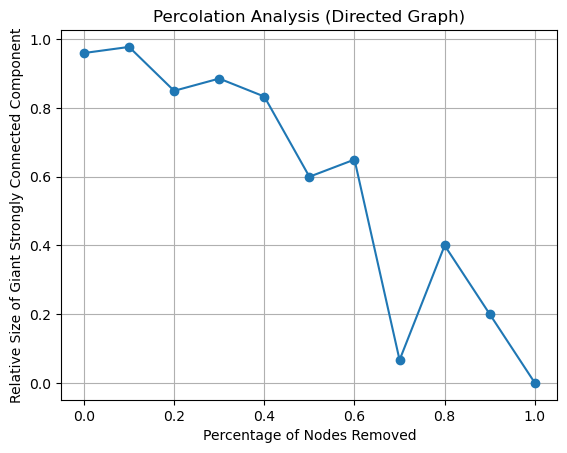

In [102]:
G = DG.copy()

def percolation_analysis_strongly_directed(graph, percentage_of_nodes_to_remove):
    G_precolated = graph.copy()
    nodes_to_remove = int(percentage_of_nodes_to_remove * len(G_precolated))
    random_nodes = list(G_precolated.nodes())
    G_precolated.remove_nodes_from(random.sample(random_nodes, nodes_to_remove))
    
    # Check if there are strongly connected components
    strongly_connected_components = list(nx.strongly_connected_components(G_precolated))
    
    if not strongly_connected_components:
        return 0.0
    
    # Measure the size of the giant strongly connected component after removal
    gscc_size = len(max(strongly_connected_components, key=len))
    
    return gscc_size / len(G_precolated.nodes())

# Perform percolation analysis over a range of removal percentages
removal_percentages = np.arange(0, 1.1, 0.1)
percolation_results = []

for percentage in removal_percentages:
    percolation_result = percolation_analysis_strongly_directed(G, percentage)
    percolation_results.append(percolation_result)

# Plot the results
plt.plot(removal_percentages, percolation_results, marker='o', linestyle='-')
plt.xlabel('Percentage of Nodes Removed')
plt.ylabel('Relative Size of Giant Strongly Connected Component')
plt.title('Percolation Analysis (Directed Graph)')
plt.grid(True)
plt.show()